# Import data

In [55]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


data_df = pd.read_csv('../data/2005_2009_curated.csv')
pred_df = pd.read_csv('../data/crash_amounts.csv')


labels = list(data_df)[3:]
print(labels)

filtered_data_df = data_df.loc[data_df['GISJOIN'].isin(pred_df["GISJOIN"].to_list())]
X = filtered_data_df[labels].to_numpy()
T = pred_df["crash_amount"].to_numpy()

['bachelors_degree', 'gini_index', 'median_household_income', 'median_age', 'white', 'black', 'native_american', 'asian', 'poverty', 'owned', 'occupied']


In [56]:
filtered_data_df

,GISJOIN,county_name,total,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied
0,G0100010,Autauga County,49584,0.218374,0.410,67931.16,36.0,0.790880,0.178566,0.003892,0.006232,0.103062,0.775481,0.919827
1,G0100030,Baldwin County,171997,0.266273,0.437,64571.76,41.0,0.865126,0.099002,0.005704,0.005698,0.119249,0.774574,0.687410
4,G0100090,Blount County,56804,0.123155,0.414,59935.92,38.2,0.947926,0.009630,0.007711,0.004348,0.109539,0.828427,0.876590
14,G0100290,Cleburne County,14579,0.101808,0.456,44539.44,40.0,0.931065,0.053570,0.003704,0.000137,0.164384,0.753362,0.816930
21,G0100430,Cullman County,80630,0.132508,0.450,50680.08,39.1,0.959742,0.012117,0.004242,0.003287,0.165830,0.735973,0.845740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,G5501090,St. Croix County,80550,0.320970,0.379,89427.36,36.0,0.963215,0.007635,0.002893,0.011111,0.058608,0.775082,0.952304
3112,G5501270,Walworth County,100069,0.252073,0.433,71161.20,37.4,0.936164,0.007325,0.001759,0.008884,0.109081,0.711512,0.776474
3114,G5501310,Washington County,128046,0.258899,0.382,85396.08,39.6,0.965302,0.008208,0.002265,0.009801,0.052716,0.785472,0.956274
3115,G5501330,Waukesha County,378848,0.384320,0.415,98295.12,41.1,0.941383,0.013831,0.001415,0.024340,0.040788,0.777171,0.953774


In [57]:
pred_df

,Unnamed: 0,county,GISJOIN,highest_price,lowest_price,crash_amount
0,0,Los Angeles County,G0600370,593553.0,369102.0,0.378148
1,1,Cook County,G1700310,309556.0,181506.0,0.413657
2,2,Harris County,G4802010,145755.0,128343.0,0.119461
3,3,Maricopa County,G0400130,311044.0,136708.0,0.560487
4,4,San Diego County,G0600730,574660.0,354517.0,0.383084
...,...,...,...,...,...,...
1289,1289,Echols County,G1301010,70523.0,53387.0,0.242985
1290,1290,Baker County,G1300070,61790.0,56433.0,0.086697
1291,1291,Webster County,G1303070,74038.0,55563.0,0.249534
1292,1292,Quitman County,G1302390,68732.0,53288.0,0.224699


In [58]:
np.std(T)

0.12580406044022335

In [61]:
np.mean(T)

0.19562135270627676

In [59]:
linreg = LinearRegression()
linreg.fit(X,T)
linreg.score(X,T)
Y = linreg.predict(X)

In [60]:
np.sqrt(np.mean((Y-T)**2))

0.12487991856412554

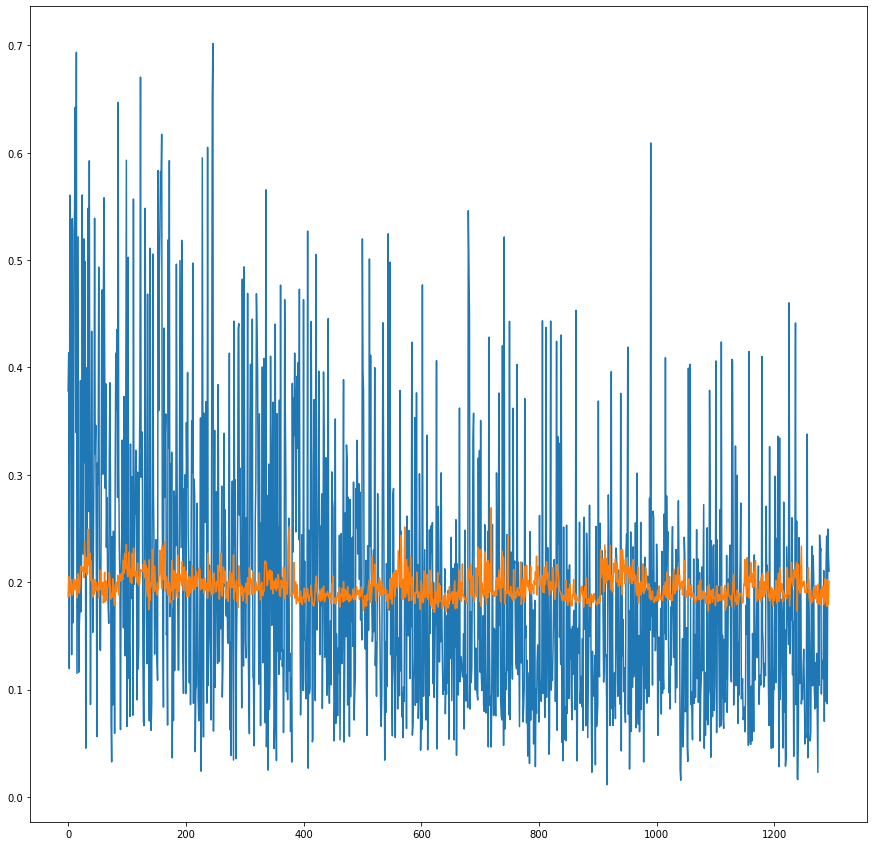

In [52]:
plt.figure(figsize=(15,15))
plt.plot(T)
plt.plot(Y)